In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import *
# Input data files are available in the "." directory.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')
print(train.shape, test.shape, sub.shape)

print(os.listdir("."))


def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1
mol_train = train['molecule_name']
mol_test = test['molecule_name']

#-----------------------------------------------------------------
print(f'There are {mol_train.shape[0]} rows in mol_train data.')
print(f'There are {mol_test.shape[0]} rows in mol_test data.')

print(f'There are {train.shape[0]} rows in train data.')
print(f'There are {test.shape[0]} rows in test data.')

print(f"There are {train['molecule_name'].nunique()} distinct molecules in train data.")
print(f"There are {test['molecule_name'].nunique()} distinct molecules in test data.")
print(f"There are {train['atom_index_0'].nunique()} unique atoms.")
print(f"There are {train['type'].nunique()} unique types.")
# ---------------------------------------------------------------

/home/sher/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sher/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/sher/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  Dep

(4658147, 6) (2505542, 5) (2505542, 2)
['y_val_pred.dat', 'extract_properties.R', 'test.csv', 'qm9_structures', 'train.csv', 'coulomb_matrix_copy.dat', 'June 23rd .ipynb', 'test_featurization.py', 'Features.csv', 'Cij_Subset2.ipynb', 'jupyter_notebook_config.py', 'Write files for smiles and properties.ipynb', 'Extraction Feedback StackOverflow.ipynb', 'Untitled1.ipynb', 'Atomic_coulomb_matrix.ipynb', 'minimal_example_Keras.py', 'features_smiles_train.csv', 'potential_energy.csv', 'copied_props.dat', 'CSV_for_features.ipynb', 'y_val_pred.csv', 'magnetic_shielding_tensors.csv', 'property_test.dat', 'scalar_coupling_contributions.csv', 'Features_added.ipynb', 'sample_submission.csv', 'Untitled.ipynb', 'coulomb_matrix_sub2.dat', 'separating by type.ipynb', 'mulliken_charges.csv', 'property_train.dat', 'structures.csv', '.ipynb_checkpoints', '.features_smiles_train_copy.dat.swp', 'dipole_moments.csv', 'dist_benchmark.csv', 'Smiles Properties extraction.ipynb', 'coulomb_matrix.dat', '.output

In [2]:
# Next we will read the property file + SMILES
infile_prop = 'Supplementary_Materials/qm9-mol-info-v1'
infile_prop_std = 'Supplementary_Materials/qm9-mol-info-standardized-v1'

print(f'There are {file_len(infile_prop)} rows in properties data.')
print(f'There are {file_len(infile_prop_std)} rows in properties standardized data.')
# ---------------------------------------------------------------

# Let's make sure with another algorithm
nlines_prop_train = sum(1 for line in open(infile_prop))
nlines_prop_std_train = sum(1 for line in open(infile_prop_std))
print(nlines_prop_train, nlines_prop_std_train)

# Now we will try and match the molecule-ID's to the train and test set
# The format of the property files are as follow:
# moleculeId	numAtoms	mu	alpha	HOMO	LUMO	gap	R2	ZPVE	U0	U	H	G	Cv	omega1	SMILES	SMILES2
# So 12 property items and 2 smiles items
# -------------------------------------------------------------------
# in these files molecule ID's are labelled qm9:000001 etc.
# Whereas in the kaggle data they are labelled dsgdb9nsd_089258 etc
# so we have to match them up 
# These were the definitions we had:


props_smiles_data_file = pd.read_csv('Supplementary_Materials/qm9-mol-info-v1', delim_whitespace=True)
ID_props_smiles = props_smiles_data_file['moleculeId']

# Now we will add the properties to the right of
# the mol_train as the training data set. In the end we will drop the first column!
#-------------------------
# First we will create a new dataframe where we replace "qm9:" with "dsgdb9nsd_" or vice versa
# df = pd.DataFrame(data, columns = ['Name', 'Age']) 
mol_train_1 = pd.DataFrame(train, columns = ['molecule_name', 'type', 'atom_index_0', 'atom_index_1', 'scalar_coupling_constant'])
mol_train_1['moleculeId'] = mol_train_1['molecule_name'].str.replace('dsgdb9nsd_', 'qm9:')
mol_train_converted = mol_train_1.drop(['molecule_name'], axis=1)
mol_train_converted.head()

There are 130830 rows in properties data.
There are 130830 rows in properties standardized data.
130830 130830


,type,atom_index_0,atom_index_1,scalar_coupling_constant,moleculeId
0,1JHC,1,0,84.8076,qm9:000001
1,2JHH,1,2,-11.2570,qm9:000001
2,2JHH,1,3,-11.2548,qm9:000001
3,2JHH,1,4,-11.2543,qm9:000001
4,1JHC,2,0,84.8074,qm9:000001


In [3]:
# Now we have to :
# 1) read the moleculeId from the df1 mol_train_converted
# 2) look up the value in the df2 props_smiles_data_file
# 3) add df2 to the right of df1 when the IDs match

left_props_smiles = pd.merge(mol_train_converted, props_smiles_data_file, on = "moleculeId", how ='left')
left_props_smiles.head()

,type,atom_index_0,atom_index_1,scalar_coupling_constant,moleculeId,numAtoms,mu,alpha,HOMO,LUMO,...,R2,ZPVE,U0,U,H,G,Cv,omega1,SMILES,SMILES_relaxed
0,1JHC,1,0,84.8076,qm9:000001,5.0,0.0,13.21,-10.549588,3.186373,...,35.3641,1.217652,-17.171748,-17.286386,-17.389216,-16.15151,6.469,3151.7078,C,C
1,2JHH,1,2,-11.2570,qm9:000001,5.0,0.0,13.21,-10.549588,3.186373,...,35.3641,1.217652,-17.171748,-17.286386,-17.389216,-16.15151,6.469,3151.7078,C,C
2,2JHH,1,3,-11.2548,qm9:000001,5.0,0.0,13.21,-10.549588,3.186373,...,35.3641,1.217652,-17.171748,-17.286386,-17.389216,-16.15151,6.469,3151.7078,C,C
3,2JHH,1,4,-11.2543,qm9:000001,5.0,0.0,13.21,-10.549588,3.186373,...,35.3641,1.217652,-17.171748,-17.286386,-17.389216,-16.15151,6.469,3151.7078,C,C
4,1JHC,2,0,84.8074,qm9:000001,5.0,0.0,13.21,-10.549588,3.186373,...,35.3641,1.217652,-17.171748,-17.286386,-17.389216,-16.15151,6.469,3151.7078,C,C


In [4]:
# Let's split the data into train and validation
from sklearn.model_selection import train_test_split

y = pd.DataFrame()
y['scalar_coupling_constant'] = left_props_smiles['scalar_coupling_constant']
# Split into validation and training data

X_train, X_valid, y_train, y_valid = train_test_split(left_props_smiles, y, random_state=1)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_valid.shape[0]))
print("Training target has {} samples.".format(y_train.shape[0]))
print("Validation target has {} samples.".format(y_valid.shape[0]))
X_train.head()

Training set has 3493610 samples.
Validation set has 1164537 samples.
Training target has 3493610 samples.
Validation target has 1164537 samples.


,type,atom_index_0,atom_index_1,scalar_coupling_constant,moleculeId,numAtoms,mu,alpha,HOMO,LUMO,...,R2,ZPVE,U0,U,H,G,Cv,omega1,SMILES,SMILES_relaxed
1373486,2JHC,15,5,1.13503,qm9:044542,18.0,3.9080,74.45,-6.495194,1.009517,...,1005.3551,4.102693,-78.592229,-79.096906,-79.533829,-73.252157,28.370,3634.4077,O=C1CC2C3CC3C2N1,O=C1C[C@H]2[C@H]3C[C@H]3[C@H]2N1
1393649,3JHH,14,15,-0.65041,qm9:045172,17.0,2.9160,72.72,-6.331930,0.421766,...,871.6001,3.813498,-72.412162,-72.899016,-73.310224,-67.319217,26.099,3465.2710,N=C1OC2CC3C2NC13,[NH][C]1O[C@H]2C[C@@H]3[C@H]2N[C@H]13
2847776,1JHC,16,5,112.24500,qm9:084473,19.0,3.3540,82.52,-6.462541,-0.408160,...,1211.0590,4.330583,-83.377258,-83.883921,-84.346558,-77.795881,31.982,3225.0697,CC1C=CC2(CC12)C=O,C[C@H]1C=C[C@]2(C[C@@H]12)C=O
2841,3JHC,13,1,5.91088,qm9:000149,15.0,0.0950,52.90,-7.409474,2.682975,...,514.3053,3.747594,-59.012661,-59.429448,-59.789336,-54.919655,21.364,3218.6387,CCC1CC1,CCC1CC1
1349445,1JHN,11,4,31.83510,qm9:043767,17.0,2.4344,74.17,-6.481589,-0.617683,...,1195.8816,3.710886,-71.494835,-71.937064,-72.348272,-66.472638,29.805,3491.0659,O=C1CC2(NC12)C1CN1,O=C1C[C@]2(N[C@@H]12)[C@H]1CN1


In [5]:
# Now we will make models by type.
# Let's see these different types first
print(f"There are {X_train['type'].nunique()} unique types.")
print(f"These are {X_train.type.unique()}")

# So now we know that one is always a hydrogen atom and the other can be carbon, hydxrogen or nitrogen

df_1jhc = X_train.loc[X_train['type'] == '1JHC']
df_2jhc = X_train.loc[X_train['type'] == '2JHC']
df_3jhc = X_train.loc[X_train['type'] == '3JHC']
df_1jhn = X_train.loc[X_train['type'] == '1JHN']
df_2jhn = X_train.loc[X_train['type'] == '2JHN']
df_3jhn = X_train.loc[X_train['type'] == '3JHN']
df_2jhh = X_train.loc[X_train['type'] == '2JHH']
df_3jhh = X_train.loc[X_train['type'] == '3JHH']
print("1JHC {} samples.".format(df_1jhc.shape[0]))
print("2JHC {} samples.".format(df_2jhc.shape[0]))
print("3JHC {} samples.".format(df_3jhc.shape[0]))

print("1JHN {} samples.".format(df_1jhn.shape[0]))
print("2JHN {} samples.".format(df_2jhn.shape[0]))
print("3JHN {} samples.".format(df_3jhn.shape[0]))

print("2JHH {} samples.".format(df_2jhh.shape[0]))
print("3JHH {} samples.".format(df_3jhh.shape[0]))

# We must drop the empty values. Let's see how many empty values for each type

print(f" There are {df_1jhc.isnull().sum().sum()} null values in df_1jhc")
print(f" There are {df_2jhc.isnull().sum().sum()} null values in df_2jhc")
print(f" There are {df_3jhc.isnull().sum().sum()} null values in df_3jhc")
      

print(f" There are {df_1jhn.isnull().sum().sum()} null values in df_1jhn")
print(f" There are {df_2jhn.isnull().sum().sum()} null values in df_1jhn")
print(f" There are {df_3jhn.isnull().sum().sum()} null values in df_1jhn")
      

print(f" There are {df_2jhh.isnull().sum().sum()} null values in df_2jhh")
print(f" There are {df_3jhh.isnull().sum().sum()} null values in df_3jhh")

There are 8 unique types.
These are ['2JHC' '3JHH' '1JHC' '3JHC' '1JHN' '2JHH' '2JHN' '3JHN']
1JHC 532078 samples.
2JHC 855387 samples.
3JHC 1132264 samples.
1JHN 32715 samples.
2JHN 89509 samples.
3JHN 124947 samples.
2JHH 283193 samples.
3JHH 443517 samples.
 There are 64 null values in df_1jhc
 There are 48 null values in df_2jhc
 There are 48 null values in df_3jhc
 There are 0 null values in df_1jhn
 There are 0 null values in df_1jhn
 There are 0 null values in df_1jhn
 There are 0 null values in df_2jhh
 There are 0 null values in df_3jhh


In [7]:
# Now we will drop several variables which contain strings from all types
xna_1 = df_1jhc.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)
xna_2 = df_2jhc.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)
xna_3 = df_3jhc.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)

X_1HC = xna_1.dropna(axis=0, how='any')
X_2HC = xna_2.dropna(axis=0, how='any')
X_3HC = xna_3.dropna(axis=0, how='any')

X_1HN = df_1jhn.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)
X_2HN = df_2jhn.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)
X_3HN = df_3jhn.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)

X_2HH = df_2jhh.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)
X_3HH = df_3jhh.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)

# Let's just make sure there are no empty values again
print(np.where(np.isnan(X_1HC)))
print(np.where(np.isnan(X_2HC)))
print(np.where(np.isnan(X_3HC)))

print(np.where(np.isnan(X_1HN)))
print(np.where(np.isnan(X_2HN)))
print(np.where(np.isnan(X_3HN)))

print(np.where(np.isnan(X_2HH)))
print(np.where(np.isnan(X_3HH)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [8]:
# Now we can prepare the models.. let's first just extract the scalar coupling constant and then drop it

y_1jhc = pd.DataFrame()
y_1jhc['scalar_coupling_constant'] = X_1HC['scalar_coupling_constant']
X_1jhc = X_1HC.drop(['scalar_coupling_constant'], axis=1)

y_2jhc = pd.DataFrame()
y_2jhc['scalar_coupling_constant'] = X_2HC['scalar_coupling_constant']
X_2jhc = X_2HC.drop(['scalar_coupling_constant'], axis=1)

y_3jhc = pd.DataFrame()
y_3jhc['scalar_coupling_constant'] = X_3HC['scalar_coupling_constant']
X_3jhc = X_3HC.drop(['scalar_coupling_constant'], axis=1)

y_1jhn = pd.DataFrame()
y_1jhn['scalar_coupling_constant'] = X_1HN['scalar_coupling_constant']
X_1jhn = X_1HN.drop(['scalar_coupling_constant'], axis=1)

y_2jhn = pd.DataFrame()
y_2jhn['scalar_coupling_constant'] = X_2HN['scalar_coupling_constant']
X_2jhn = X_2HN.drop(['scalar_coupling_constant'], axis=1)

y_3jhn = pd.DataFrame()
y_3jhn['scalar_coupling_constant'] = X_3HN['scalar_coupling_constant']
X_3jhn = X_3HN.drop(['scalar_coupling_constant'], axis=1)


y_2jhh = pd.DataFrame()
y_2jhh['scalar_coupling_constant'] = X_2HH['scalar_coupling_constant']
X_2jhh = X_2HH.drop(['scalar_coupling_constant'], axis=1)

y_3jhh = pd.DataFrame()
y_3jhh['scalar_coupling_constant'] = X_3HH['scalar_coupling_constant']
X_3jhh = X_3HH.drop(['scalar_coupling_constant'], axis=1)

In [9]:
from sklearn.ensemble import RandomForestRegressor


# Define the models
# Let's use a simple random forest regressor
m_1 = RandomForestRegressor(n_estimators=150, max_depth = 9, min_samples_leaf=3,
n_jobs=-1, oob_score=True)
m_1.fit(X_1jhc, y_1jhc)
print('Model 1 Defined')

m_2 = RandomForestRegressor(n_estimators=150, max_depth = 9, min_samples_leaf=3,
n_jobs=-1, oob_score=True)
m_2.fit(X_2jhc, y_2jhc)
print('Model 2 Defined')

m_3 = RandomForestRegressor(n_estimators=150, max_depth = 9, min_samples_leaf=3,
n_jobs=-1, oob_score=True)
m_3.fit(X_3jhc, y_3jhc)
print('Model 3 Defined')

m_4 = RandomForestRegressor(n_estimators=150, max_depth = 9, min_samples_leaf=3,
n_jobs=-1, oob_score=True)
m_4.fit(X_1jhn, y_1jhn)
print('Model 4 Defined')

m_5 = RandomForestRegressor(n_estimators=150, max_depth = 9, min_samples_leaf=3,
n_jobs=-1, oob_score=True)
m_5.fit(X_2jhn, y_2jhn)
print('Model 5 Defined')

m_6 = RandomForestRegressor(n_estimators=150, max_depth = 9, min_samples_leaf=3,
n_jobs=-1, oob_score=True)
m_6.fit(X_3jhn, y_3jhn)
print('Model 6 Defined')

m_7 = RandomForestRegressor(n_estimators=150, max_depth = 9, min_samples_leaf=3,
n_jobs=-1, oob_score=True)
m_7.fit(X_2jhh, y_2jhh)
print('Model 7 Defined')

m_8 = RandomForestRegressor(n_estimators=150, max_depth = 9, min_samples_leaf=3,
n_jobs=-1, oob_score=True)
m_8.fit(X_3jhh, y_3jhh)
print('Model 8 Defined')


/home/sher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model 1 Defined


/home/sher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model 2 Defined


/home/sher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model 3 Defined


/home/sher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model 4 Defined


/home/sher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model 5 Defined


/home/sher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model 6 Defined


/home/sher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model 7 Defined


/home/sher/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model 8 Defined


In [10]:
# Let's separate this model for the validation set
# Let's see these different types first
print(f"There are {X_valid['type'].nunique()} unique types.")
print(f"These are {X_valid.type.unique()}")


dfv_1jhc = X_valid.loc[X_valid['type'] == '1JHC']
dfv_2jhc = X_valid.loc[X_valid['type'] == '2JHC']
dfv_3jhc = X_valid.loc[X_valid['type'] == '3JHC']
dfv_1jhn = X_valid.loc[X_valid['type'] == '1JHN']
dfv_2jhn = X_valid.loc[X_valid['type'] == '2JHN']
dfv_3jhn = X_valid.loc[X_valid['type'] == '3JHN']
dfv_2jhh = X_valid.loc[X_valid['type'] == '2JHH']
dfv_3jhh = X_valid.loc[X_valid['type'] == '3JHH']
print("1JHC {} samples.".format(dfv_1jhc.shape[0]))
print("2JHC {} samples.".format(dfv_2jhc.shape[0]))
print("3JHC {} samples.".format(dfv_3jhc.shape[0]))

print("1JHN {} samples.".format(dfv_1jhn.shape[0]))
print("2JHN {} samples.".format(dfv_2jhn.shape[0]))
print("3JHN {} samples.".format(dfv_3jhn.shape[0]))

print("2JHH {} samples.".format(dfv_2jhh.shape[0]))
print("3JHH {} samples.".format(dfv_3jhh.shape[0]))

# Let's see how many empty values for each validation type

print(f" There are {dfv_1jhc.isnull().sum().sum()} null values in dfv_1jhc")
print(f" There are {dfv_2jhc.isnull().sum().sum()} null values in dfv_2jhc")
print(f" There are {dfv_3jhc.isnull().sum().sum()} null values in dfv_3jhc")
      

print(f" There are {dfv_1jhn.isnull().sum().sum()} null values in dfv_1jhn")
print(f" There are {dfv_2jhn.isnull().sum().sum()} null values in dfv_1jhn")
print(f" There are {dfv_3jhn.isnull().sum().sum()} null values in dfv_1jhn")
      

print(f" There are {dfv_2jhh.isnull().sum().sum()} null values in dfv_2jhh")
print(f" There are {dfv_3jhh.isnull().sum().sum()} null values in dfv_3jhh")

There are 8 unique types.
These are ['3JHC' '2JHH' '3JHH' '1JHC' '3JHN' '2JHC' '1JHN' '2JHN']
1JHC 177338 samples.
2JHC 285287 samples.
3JHC 378115 samples.
1JHN 10648 samples.
2JHN 29744 samples.
3JHN 41468 samples.
2JHH 94843 samples.
3JHH 147094 samples.
 There are 0 null values in dfv_1jhc
 There are 16 null values in dfv_2jhc
 There are 16 null values in dfv_3jhc
 There are 0 null values in dfv_1jhn
 There are 0 null values in dfv_1jhn
 There are 0 null values in dfv_1jhn
 There are 0 null values in dfv_2jhh
 There are 0 null values in dfv_3jhh


In [11]:
X_2HC = dfv_2jhc.dropna(axis=0, how='any')
X_3HC = dfv_3jhc.dropna(axis=0, how='any')

Xv_1hc = dfv_1jhc.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)
Xv_2hc = X_2HC.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)
Xv_3hc = X_3HC.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)

Xv_1hn = dfv_1jhn.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)
Xv_2hn = dfv_2jhn.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)
Xv_3hn = dfv_3jhn.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)

Xv_2hh = dfv_2jhh.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)
Xv_3hh = dfv_3jhh.drop(['type', 'moleculeId', 'SMILES', 'SMILES_relaxed'], axis=1)

# Let's extract scalar coupling constant and then drop it

yv_1jhc = pd.DataFrame()
yv_1jhc['scalar_coupling_constant'] = Xv_1hc['scalar_coupling_constant']
Xv_1jhc = Xv_1hc.drop(['scalar_coupling_constant'], axis=1)

yv_2jhc = pd.DataFrame()
yv_2jhc['scalar_coupling_constant'] = Xv_2hc['scalar_coupling_constant']
Xv_2jhc = Xv_2hc.drop(['scalar_coupling_constant'], axis=1)

yv_3jhc = pd.DataFrame()
yv_3jhc['scalar_coupling_constant'] = Xv_3hc['scalar_coupling_constant']
Xv_3jhc = Xv_3hc.drop(['scalar_coupling_constant'], axis=1)

yv_1jhn = pd.DataFrame()
yv_1jhn['scalar_coupling_constant'] = Xv_1hn['scalar_coupling_constant']
Xv_1jhn = Xv_1hn.drop(['scalar_coupling_constant'], axis=1)

yv_2jhn = pd.DataFrame()
yv_2jhn['scalar_coupling_constant'] = Xv_2hn['scalar_coupling_constant']
Xv_2jhn = Xv_2hn.drop(['scalar_coupling_constant'], axis=1)

yv_3jhn = pd.DataFrame()
yv_3jhn['scalar_coupling_constant'] = Xv_3hn['scalar_coupling_constant']
Xv_3jhn = Xv_3hn.drop(['scalar_coupling_constant'], axis=1)

yv_2jhh = pd.DataFrame()
yv_2jhh['scalar_coupling_constant'] = Xv_2hh['scalar_coupling_constant']
Xv_2jhh = Xv_2hh.drop(['scalar_coupling_constant'], axis=1)

yv_3jhh = pd.DataFrame()
yv_3jhh['scalar_coupling_constant'] = Xv_3hh['scalar_coupling_constant']
Xv_3jhh = Xv_3hh.drop(['scalar_coupling_constant'], axis=1)

# Now let's make the predictions for the each type
y1hc_pred = m_1.predict(Xv_1jhc)
y2hc_pred = m_2.predict(Xv_2jhc)
y3hc_pred = m_3.predict(Xv_3jhc)

y1hn_pred = m_4.predict(Xv_1jhn)
y2hn_pred = m_5.predict(Xv_2jhn)
y3hn_pred = m_6.predict(Xv_3jhn)

y2hh_pred = m_7.predict(Xv_2jhh)
y3hh_pred = m_8.predict(Xv_3jhh)

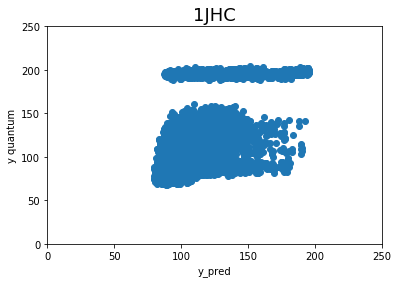

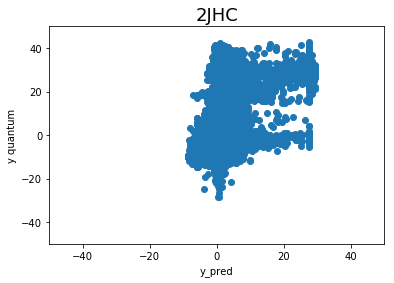

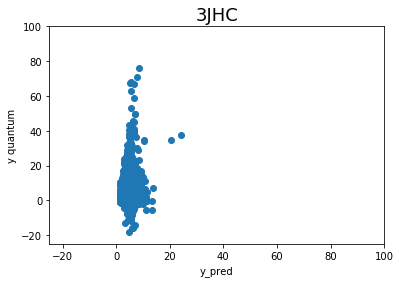

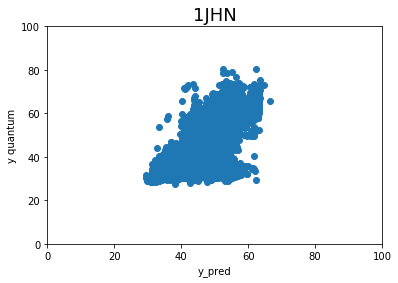

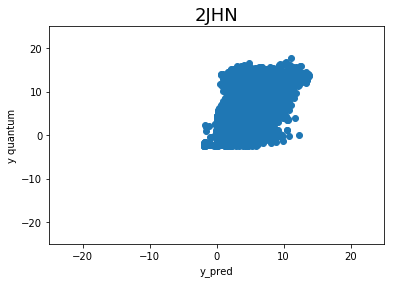

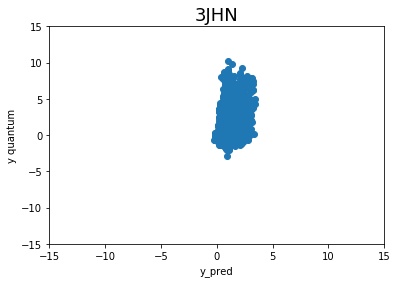

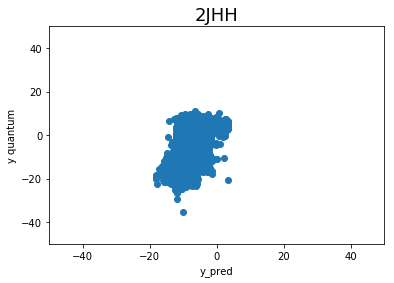

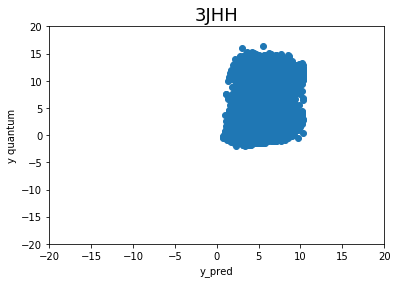

In [12]:
import matplotlib.pyplot as plt 

# Plot
plt.scatter(y1hc_pred, yv_1jhc)
plt.title('Scatter plot')
plt.xlim(0, 250)
plt.ylim(0, 250)
plt.xlabel('y_pred')
plt.ylabel('y quantum')
plt.title('1JHC', fontsize=18)
plt.show()

# Plot
plt.scatter(y2hc_pred, yv_2jhc)
plt.title('Scatter plot')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel('y_pred')
plt.ylabel('y quantum')
plt.title('2JHC', fontsize=18)
plt.show()

# Plot
plt.scatter(y3hc_pred, yv_3jhc)
plt.title('Scatter plot')
plt.xlim(-25, 100)
plt.ylim(-25, 100)
plt.xlabel('y_pred')
plt.ylabel('y quantum')
plt.title('3JHC', fontsize=18)
plt.show()

# Plot
plt.scatter(y1hn_pred, yv_1jhn)
plt.title('Scatter plot')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('y_pred')
plt.ylabel('y quantum')
plt.title('1JHN', fontsize=18)
plt.show()

# Plot
plt.scatter(y2hn_pred, yv_2jhn)
plt.title('Scatter plot')
plt.xlim(-25, 25)
plt.ylim(-25, 25)
plt.xlabel('y_pred')
plt.ylabel('y quantum')
plt.title('2JHN', fontsize=18)
plt.show()

# Plot
plt.scatter(y3hn_pred, yv_3jhn)
plt.title('Scatter plot')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('y_pred')
plt.ylabel('y quantum')
plt.title('3JHN', fontsize=18)
plt.show()

# Plot
plt.scatter(y2hh_pred, yv_2jhh)
plt.title('Scatter plot')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel('y_pred')
plt.ylabel('y quantum')
plt.title('2JHH', fontsize=18)
plt.show()

# Plot
plt.scatter(y3hh_pred, yv_3jhh)
plt.title('Scatter plot')
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.xlabel('y_pred')
plt.ylabel('y quantum')
plt.title('3JHH', fontsize=18)
plt.show()

In [ ]:
def metric(df, preds):
    maes = []
    mae = np.log(metrics.mean_absolute_error(y_true, y_pred))
    maes.append(mae)
    return np.mean(maes)

